Imports

In [1]:
from models import ff_eucl, ff_hyp
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import geoopt
from time import time
from torchvision import datasets, transforms
import helper
torch.cuda.is_available()

False

CUDA check

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using {}'.format(device))

Using cpu


Data Transformation

In [3]:
transform = transforms.Compose([transforms.ToTensor(),
                                #transforms.Normalize((0.1307,), (0.3081,)), 
                              ])

Training and Test data from MNIST data set

In [4]:
trainset = datasets.KMNIST('PATH_TO_STORE_TRAINSET', download=True, train=True, transform=transform)
valset = datasets.KMNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=512, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=512, shuffle=True)

18165760it [00:15, 1154519.76it/s]                              


Extracting PATH_TO_STORE_TRAINSET\KMNIST\raw\train-images-idx3-ubyte.gz to PATH_TO_STORE_TRAINSET\KMNIST\raw



29696it [00:00, 113113.73it/s]                          


Extracting PATH_TO_STORE_TRAINSET\KMNIST\raw\train-labels-idx1-ubyte.gz to PATH_TO_STORE_TRAINSET\KMNIST\raw



3041280it [00:03, 760681.50it/s]                              


Extracting PATH_TO_STORE_TRAINSET\KMNIST\raw\t10k-images-idx3-ubyte.gz to PATH_TO_STORE_TRAINSET\KMNIST\raw



100%|██████████| 5120/5120 [00:00<?, ?it/s]
C:\Users\pc 3\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Extracting PATH_TO_STORE_TRAINSET\KMNIST\raw\t10k-labels-idx1-ubyte.gz to PATH_TO_STORE_TRAINSET\KMNIST\raw



18165760it [00:17, 1026622.93it/s]                              


Extracting PATH_TO_STORE_TESTSET\KMNIST\raw\train-images-idx3-ubyte.gz to PATH_TO_STORE_TESTSET\KMNIST\raw



29696it [00:00, 108187.83it/s]                          


Extracting PATH_TO_STORE_TESTSET\KMNIST\raw\train-labels-idx1-ubyte.gz to PATH_TO_STORE_TESTSET\KMNIST\raw



3041280it [00:04, 652536.73it/s]                             


Extracting PATH_TO_STORE_TESTSET\KMNIST\raw\t10k-images-idx3-ubyte.gz to PATH_TO_STORE_TESTSET\KMNIST\raw



100%|██████████| 5120/5120 [00:00<00:00, 5106976.57it/s]

Extracting PATH_TO_STORE_TESTSET\KMNIST\raw\t10k-labels-idx1-ubyte.gz to PATH_TO_STORE_TESTSET\KMNIST\raw



Initializing the model

In [5]:
model = feed_forward_EUCL.EuclFF(784, 512, 256, 10, nn.ReLU())
model.to(device)

EuclFF(
  (act_fn): ReLU()
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)

In [6]:
print(model)

EuclFF(
  (act_fn): ReLU()
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


Hyperparameters

In [7]:
#learning_rate = 8e-1 
learning_rate = 2e-1 #learning rate for ReLU activation function
#learning_rate = 2e-1 #current learning rate for model without activation functions
momentum = 0.9

Loss Function

In [8]:
criterion = nn.CrossEntropyLoss()

Optimizer

In [9]:
optimizer = geoopt.optim.RiemannianSGD(model.parameters(), lr=learning_rate, momentum=momentum)

In [10]:

time0 = time()

epochs = 10
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)
        # Flatten MNIST images into a 784 long vector
        images = 0.0357*images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #backpropagation
        loss.backward()
        
        #Weight optimization
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 2.164811130297386
Epoch 1 - Training loss: 1.2067461710865215
Epoch 2 - Training loss: 0.756505996999094
Epoch 3 - Training loss: 0.5682613094479351
Epoch 4 - Training loss: 0.4758656401250322
Epoch 5 - Training loss: 0.42068147507764525
Epoch 6 - Training loss: 0.37822230892666314
Epoch 7 - Training loss: 0.32588221334804923
Epoch 8 - Training loss: 0.2952394907252263
Epoch 9 - Training loss: 0.2792384792434967

Training Time (in minutes) = 1.628445831934611


tensor([[-7.5912,  2.5801,  1.7048, -5.9399,  0.5821,  0.3765,  9.5100, -0.9475,
          3.0337, -3.9730]])
[-7.591187, 2.580137, 1.7048321, -5.93993, 0.5821033, 0.3764752, 9.509962, -0.9474998, 3.0337446, -3.972954]
Predicted Digit = 6


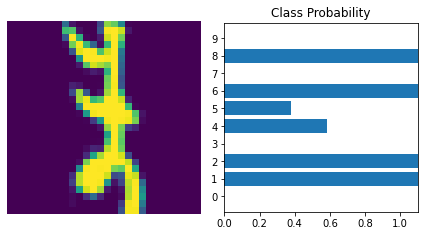

In [11]:
images, labels = next(iter(valloader))
#images, labels = images.to(device), labels.to(device)

img = 0.0357*images[0].view(1, 784)
img_gpu = img.to(device)
with torch.no_grad():
    out = model(img_gpu)

ps = out.cpu()
print(ps)
probab = list(ps.numpy()[0])
print(probab)
print("Predicted Digit =", probab.index(max(probab)))
helper.view_classify(img.view(1, 28, 28), ps)

In [14]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  images, labels = images.to(device), labels.to(device)
  for i in range(len(labels)):
    img = 0.0357*images[i].view(1, 784)
    with torch.no_grad():
        out = model(img)

    
    ps = out.cpu()
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.cpu().numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.8022


Current status of experiments:
1. Using just Hyperboic Linear modules, and with the appropriate self-tuned hyperparameters, and a batch size of 512, the average accuracy was around 90 percent
2. With the use of activation functions(ReLu, ReLu, then LogSoftMax at the output layer), (by applying the functions in the tangent space, then mapping it back to the hyperbolic space), we see an increase in the model accuracy to about 97-98 percent.
3. To account for the correct class probabilities , linear layer was used as the output layer instead, together with the crossentropy loss function.